In [0]:
!mv validation data

In [3]:
!unzip data/data.zip

Archive:  data/data.zip
   creating: train/
   creating: train/t0/
  inflating: train/t0/0.png          
  inflating: train/t0/1.png          
  inflating: train/t0/10.png         
  inflating: train/t0/100.png        
  inflating: train/t0/101.png        
  inflating: train/t0/102.png        
  inflating: train/t0/103.png        
  inflating: train/t0/104.png        
  inflating: train/t0/105.png        
  inflating: train/t0/106.png        
  inflating: train/t0/107.png        
  inflating: train/t0/108.png        
  inflating: train/t0/109.png        
  inflating: train/t0/11.png         
  inflating: train/t0/110.png        
  inflating: train/t0/111.png        
  inflating: train/t0/112.png        
  inflating: train/t0/113.png        
  inflating: train/t0/114.png        
  inflating: train/t0/115.png        
  inflating: train/t0/116.png        
  inflating: train/t0/117.png        
  inflating: train/t0/118.png        
  inflating: train/t0/119.png        
  inflating: train/t0

In [0]:
import numpy as np
import cv2 as cv

img = cv.imread('data/gulim_9.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=35,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

In [0]:
!conda install opencv2

In [0]:
!pip install opencv

  Could not find a version that satisfies the requirement opencv (from versions: )
No matching distribution found for opencv
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [0]:
import os, shutil

base_dir = './data'

for i in range(10):
    data_dir = os.path.join(base_dir, 'number_' + str(i))
    os.mkdir(data_dir)

In [0]:
fonts = ['gulim', 'ggd', 'gs', 'smj']
fnames = [ (font +'_' + str(i) + '.png', i, font) for i in range(10) for font in fonts]

'gulim'

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2)

In [0]:
img_path = os.path.join(base_dir, fnames[3][0])

In [0]:
img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

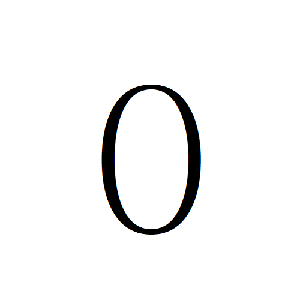

In [0]:
img

In [0]:
x

array([[[[ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         ..., 
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.]],

        [[ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         ..., 
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.]],

        [[ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         ..., 
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.]],

        ..., 
        [[ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         ..., 
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.]],

        [[ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         ..., 
         [ 255.,  255.,  255.],
       

In [0]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    cv2.imwrite('./data/number_0/' + str(i) + '.png', batch[0])
    i += 1
    if i % 100 == 0:
        break


In [0]:
labels = {i : 0 for i in range(10)}

for fname, label, font in fnames:
    img_path = os.path.join(base_dir, fname)
    
    img = image.load_img(img_path, target_size=(300, 300, 3))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        a = labels[label] * 100 + i

        cv2.imwrite('./data/number_'+ str(label) + '/' + str(a) + '.png', batch[0])
        i += 1
        if i % 100 == 0:
            break
    labels[label] += 1
    

NameError: name 'fnames' is not defined

In [0]:
labels

{'ggd': 10, 'gs': 10, 'gulim': 10, 'smj': 10}

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17305895377526490360
]


In [62]:
# 케라스 모델 구축
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(516, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [7]:
from keras.preprocessing import image

img = image.load_img("./data/gulim_0.png", target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

x.shape

FileNotFoundError: ignored

데이터 전처리

In [59]:
import os, shutil

base_dir = './data'

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
train_dir_directories = { str(i):os.path.join(train_dir, "t"+str(i)) for i in range(10)}
for i in train_dir_directories.values():
    if not os.path.exists(i):
        os.mkdir(i)
        
validation_dir_directories = { str(i):os.path.join(validation_dir, "v"+str(i)) for i in range(10)}
for i in validation_dir_directories.values():
    if not os.path.exists(i):
        os.mkdir(i)


In [60]:
train_dir_directories

{'0': './data\\train\\t0',
 '1': './data\\train\\t1',
 '2': './data\\train\\t2',
 '3': './data\\train\\t3',
 '4': './data\\train\\t4',
 '5': './data\\train\\t5',
 '6': './data\\train\\t6',
 '7': './data\\train\\t7',
 '8': './data\\train\\t8',
 '9': './data\\train\\t9'}

In [61]:
fnames = [('number_{}/{}.png'.format(j,i), str(j)) for i in range(200) for j in range(10)]

for fname, label in fnames:
    src = os.path.join(base_dir, fname)
    dst = os.path.join(train_dir_directories[label], fname.split('/')[1])
    shutil.copyfile(src, dst)
    
fnames = [('number_{}/{}.png'.format(j,i), str(j)) for i in range(200, 300) for j in range(10)]
for fname, label in fnames:
    src = os.path.join(base_dir, fname)
    dst = os.path.join(validation_dir_directories[label], fname.split('/')[1])
    shutil.copyfile(src, dst)


In [0]:
fnames

[('number_0/200.png', '0'),
 ('number_1/200.png', '1'),
 ('number_2/200.png', '2'),
 ('number_3/200.png', '3'),
 ('number_4/200.png', '4'),
 ('number_5/200.png', '5'),
 ('number_6/200.png', '6'),
 ('number_7/200.png', '7'),
 ('number_8/200.png', '8'),
 ('number_9/200.png', '9'),
 ('number_0/201.png', '0'),
 ('number_1/201.png', '1'),
 ('number_2/201.png', '2'),
 ('number_3/201.png', '3'),
 ('number_4/201.png', '4'),
 ('number_5/201.png', '5'),
 ('number_6/201.png', '6'),
 ('number_7/201.png', '7'),
 ('number_8/201.png', '8'),
 ('number_9/201.png', '9'),
 ('number_0/202.png', '0'),
 ('number_1/202.png', '1'),
 ('number_2/202.png', '2'),
 ('number_3/202.png', '3'),
 ('number_4/202.png', '4'),
 ('number_5/202.png', '5'),
 ('number_6/202.png', '6'),
 ('number_7/202.png', '7'),
 ('number_8/202.png', '8'),
 ('number_9/202.png', '9'),
 ('number_0/203.png', '0'),
 ('number_1/203.png', '1'),
 ('number_2/203.png', '2'),
 ('number_3/203.png', '3'),
 ('number_4/203.png', '4'),
 ('number_5/203.png'

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50), 
    batch_size=20,
    class_mode='categorical',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(50, 50),
    batch_size=20,
    class_mode='categorical',
)

Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
)

Epoch 1/100
100/100 [==============================] - 8s 79ms/step - loss: 2.2722 - acc: 0.1455 - val_loss: 2.1887 - val_acc: 0.2090
Epoch 2/100
100/100 [==============================] - 7s 73ms/step - loss: 1.9604 - acc: 0.2765 - val_loss: 1.8820 - val_acc: 0.3330
Epoch 3/100
100/100 [==============================] - 7s 72ms/step - loss: 1.4878 - acc: 0.4610 - val_loss: 1.8609 - val_acc: 0.3400
Epoch 4/100
100/100 [==============================] - 7s 72ms/step - loss: 1.0308 - acc: 0.6245 - val_loss: 1.3264 - val_acc: 0.5300
Epoch 5/100
100/100 [==============================] - 7s 72ms/step - loss: 0.6525 - acc: 0.7800 - val_loss: 1.5034 - val_acc: 0.6370
Epoch 6/100
100/100 [==============================] - 7s 73ms/step - loss: 0.4005 - acc: 0.8660 - val_loss: 1.0560 - val_acc: 0.6940
Epoch 7/100
100/100 [==============================] - 7s 73ms/step - loss: 0.2835 - acc: 0.9025 - val_loss: 0.9529 - val_acc: 0.7360
Epoch 8/100
100/100 [==============================] - 7s 72ms

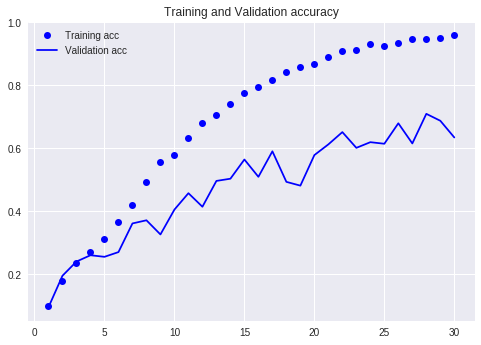

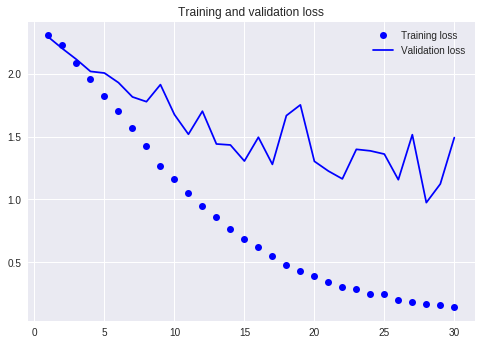

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.save('number_recoginition_draft_1.h5')